In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [8]:
import seaborn as sns

In [9]:
df = pd.read_csv('patient_information_vi_cleaned.csv')

In [10]:
df.head()

,ID,Tuổi,Giới tính,Địa điểm,Tình trạng,Quốc tịch,status,gender,age_range,nationality,in_HCM
0,1,66,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,0,0,1
1,2,28,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,1,0,1
2,3,25,Nữ,Thanh Hóa,Khỏi,Việt Nam,0,0,1,1,0
3,4,29,Nam,Vĩnh Phúc,Khỏi,Việt Nam,0,1,1,1,0
4,5,23,Nữ,Vĩnh Phúc,Khỏi,Việt Nam,0,0,1,1,0


In [11]:
df.columns

Index(['ID', 'Tuổi', 'Giới tính', 'Địa điểm', 'Tình trạng', 'Quốc tịch',
       'status', 'gender', 'age_range', 'nationality', 'in_HCM'],
      dtype='object')

In [12]:
df['Giới tính'].value_counts()

Chưa xác định    17158
Nam               1453
Nữ                1320
0                    2
Name: Giới tính, dtype: int64

In [53]:
df['Tình trạng'].value_counts()

Đang điều trị    11806
Khỏi              8022
Name: Tình trạng, dtype: int64

In [13]:
# 1: VN, 0: others
df['nationality'].value_counts()

1    19685
0      248
Name: nationality, dtype: int64

In [14]:
# 1: in HCM, 0: somewhere else
df['in_HCM'].value_counts()

0    13561
1     6372
Name: in_HCM, dtype: int64

In [15]:
df['Địa điểm'].value_counts()

Hồ Chí Minh          6372
Bắc Giang            5768
Bắc Ninh             1633
Hải Dương             813
Đà Nẵng               749
Hà Nội                744
Bình Dương            680
Phú Yên               245
Long An               209
Khánh Hòa             178
Tiền Giang            174
Hưng Yên              166
Tây Ninh              154
Bà Rịa - Vũng Tàu     152
Quảng Nam             136
Hà Tĩnh               128
Nghệ An               127
Quảng Ngãi            124
Vĩnh Phúc             113
Lạng Sơn              110
Quảng Ninh             99
Đồng Nai               96
Kiên Giang             94
Đồng Tháp              92
Thái Bình              76
Điện Biên              59
Bạc Liêu               56
Hà Nam                 56
An Giang               55
Ninh Bình              51
Hoà Bình               39
Cần Thơ                35
Thanh Hóa              31
Gia Lai                31
Vĩnh Long              29
Nam Định               26
Bình Thuận             25
Hải Phòng              24
Bến Tre     

In [16]:
df.describe()

,ID,Tuổi,status,gender,age_range,nationality,in_HCM
count,19933.000000,19933.000000,19933.000000,19933.000000,19933.000000,19933.000000,19933.000000
mean,9967.000000,33.035419,0.602619,1.794662,0.961822,0.987558,0.319671
std,5754.305794,16.204736,0.499616,0.543721,0.191630,0.110849,0.466361
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4984.000000,23.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,9967.000000,31.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,14950.000000,41.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,19933.000000,450.000000,2.000000,2.000000,1.000000,1.000000,1.000000


Eliminate missing data - age over 100

In [17]:
df.drop(df[(df['Tuổi'] > 100)].index, inplace=True)
df

,ID,Tuổi,Giới tính,Địa điểm,Tình trạng,Quốc tịch,status,gender,age_range,nationality,in_HCM
0,1,66,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,0,0,1
1,2,28,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,1,0,1
2,3,25,Nữ,Thanh Hóa,Khỏi,Việt Nam,0,0,1,1,0
3,4,29,Nam,Vĩnh Phúc,Khỏi,Việt Nam,0,1,1,1,0
4,5,23,Nữ,Vĩnh Phúc,Khỏi,Việt Nam,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19928,19929,18,Chưa xác định,Hồ Chí Minh,Đang điều trị,Việt Nam,1,2,1,1,1
19929,19930,15,Chưa xác định,Hồ Chí Minh,Đang điều trị,Việt Nam,1,2,1,1,1
19930,19931,23,Chưa xác định,Hồ Chí Minh,Đang điều trị,Việt Nam,1,2,1,1,1
19931,19932,50,Chưa xác định,Hồ Chí Minh,Đang điều trị,Việt Nam,1,2,1,1,1


Randomize missing gender

In [18]:
gender_not_define_index = df.loc[df['gender']== 2].index

In [19]:
gender_not_define_list = gender_not_define_index.tolist()

In [20]:
len_undefined_gender = len(gender_not_define_list)

In [21]:
len_undefined_gender

17156

In [22]:
#randomize the missing gender to 0 or 1
random_list= []
for i in range(len_undefined_gender):
    ran_num = random.randint(0,1)
    random_list.append(ran_num)

In [23]:
df.loc[gender_not_define_index, ['gender']] = random_list

In [24]:
df['gender'].value_counts()

1    9973
0    9956
Name: gender, dtype: int64

In [25]:
df['Giới tính'] = df['gender'].apply(lambda x: 'Nam' if x == 1 else 'Nữ')

In [26]:
df

,ID,Tuổi,Giới tính,Địa điểm,Tình trạng,Quốc tịch,status,gender,age_range,nationality,in_HCM
0,1,66,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,0,0,1
1,2,28,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,1,0,1
2,3,25,Nữ,Thanh Hóa,Khỏi,Việt Nam,0,0,1,1,0
3,4,29,Nam,Vĩnh Phúc,Khỏi,Việt Nam,0,1,1,1,0
4,5,23,Nữ,Vĩnh Phúc,Khỏi,Việt Nam,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19928,19929,18,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1
19929,19930,15,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1
19930,19931,23,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1
19931,19932,50,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1


Group the age

In [27]:
df["age_grouped"] = pd.cut(df["Tuổi"], bins=[0,10,20,30,40,50,60,70,90,100])

In [28]:
df

,ID,Tuổi,Giới tính,Địa điểm,Tình trạng,Quốc tịch,status,gender,age_range,nationality,in_HCM,age_grouped
0,1,66,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,0,0,1,"(60, 70]"
1,2,28,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,1,0,1,"(20, 30]"
2,3,25,Nữ,Thanh Hóa,Khỏi,Việt Nam,0,0,1,1,0,"(20, 30]"
3,4,29,Nam,Vĩnh Phúc,Khỏi,Việt Nam,0,1,1,1,0,"(20, 30]"
4,5,23,Nữ,Vĩnh Phúc,Khỏi,Việt Nam,0,0,1,1,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...
19928,19929,18,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19929,19930,15,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19930,19931,23,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(20, 30]"
19931,19932,50,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(40, 50]"


Visualization

<AxesSubplot:>

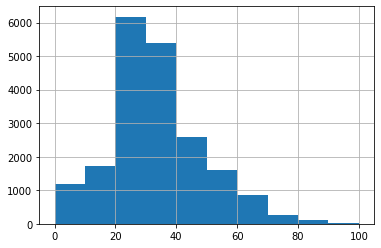

In [29]:
df['Tuổi'].hist()

In [30]:
df[['Tuổi','gender','status','in_HCM']].corr()

,Tuổi,gender,status,in_HCM
Tuổi,1.000000,-0.001070,0.042849,0.053391
gender,-0.001070,1.000000,-0.016094,-0.001230
status,0.042849,-0.016094,1.000000,0.418553
in_HCM,0.053391,-0.001230,0.418553,1.000000


<AxesSubplot:>

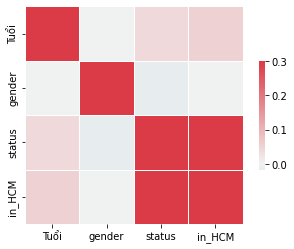

In [31]:
#Correlation is important for building modeling, regression

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df[['Tuổi','gender','status','in_HCM']].corr(),cmap=cmap, vmax=.3, center=0, square=True,linewidth=.5, cbar_kws={'shrink': .5})

In [32]:
df_cat = df[['gender','Tuổi','Địa điểm','Tình trạng','age_grouped']]

graph for gender: total = 2


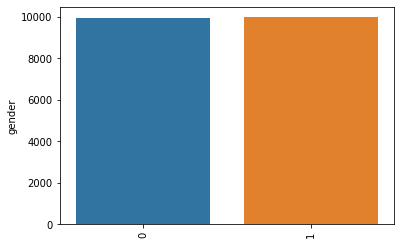

graph for Tuổi: total = 99


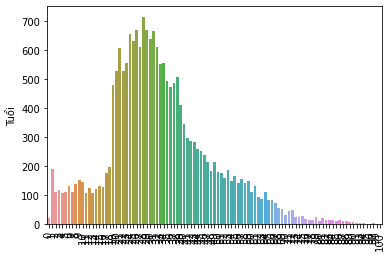

graph for Địa điểm: total = 59


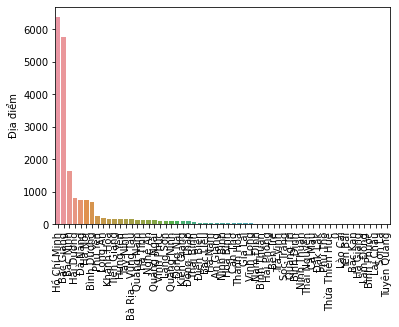

graph for Tình trạng: total = 5


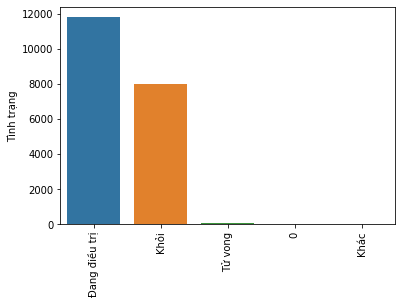

graph for age_grouped: total = 9


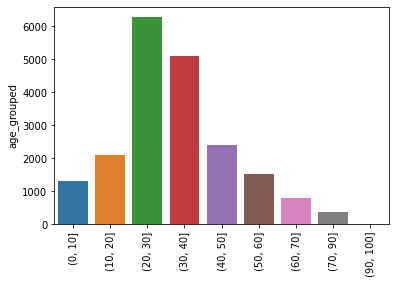

In [33]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y= cat_num, )
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for age_grouped: total = 9


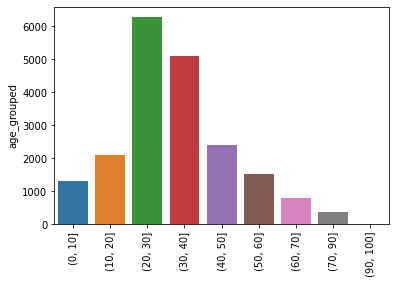

In [34]:
for i in df_cat[['age_grouped']].columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y= cat_num, )
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for Địa điểm: total = 30


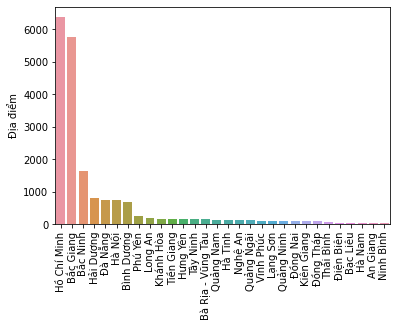

In [35]:
for i in df_cat[['Địa điểm']].columns:
    cat_num = df_cat[i].value_counts()[:30]
    print('graph for %s: total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y= cat_num, )
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [36]:
df['in_HCM'].value_counts()

0    13557
1     6372
Name: in_HCM, dtype: int64

In [37]:
#get positive case
df.loc[df['status'] == 1]

,ID,Tuổi,Giới tính,Địa điểm,Tình trạng,Quốc tịch,status,gender,age_range,nationality,in_HCM,age_grouped
1170,1171,34,Nam,Đồng Tháp,Đang điều trị,Ấn Độ,1,1,1,0,0,"(30, 40]"
1834,1835,20,Nam,Hải Dương,Đang điều trị,Việt Nam,1,1,1,1,0,"(10, 20]"
1856,1857,43,Nam,Hà Nội,Đang điều trị,Nga,1,1,1,0,0,"(40, 50]"
2080,2081,32,Nam,Hải Dương,Đang điều trị,Việt Nam,1,1,1,1,0,"(30, 40]"
2234,2235,31,Nữ,Hải Dương,Đang điều trị,Việt Nam,1,0,1,1,0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
19928,19929,18,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19929,19930,15,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19930,19931,23,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(20, 30]"
19931,19932,50,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(40, 50]"


In [38]:
#Drop rows that has status of values different than 0 or 1
df.drop(df[(df['status']==2)].index, inplace=True)
df

,ID,Tuổi,Giới tính,Địa điểm,Tình trạng,Quốc tịch,status,gender,age_range,nationality,in_HCM,age_grouped
0,1,66,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,0,0,1,"(60, 70]"
1,2,28,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,1,0,1,"(20, 30]"
2,3,25,Nữ,Thanh Hóa,Khỏi,Việt Nam,0,0,1,1,0,"(20, 30]"
3,4,29,Nam,Vĩnh Phúc,Khỏi,Việt Nam,0,1,1,1,0,"(20, 30]"
4,5,23,Nữ,Vĩnh Phúc,Khỏi,Việt Nam,0,0,1,1,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...
19928,19929,18,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19929,19930,15,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19930,19931,23,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(20, 30]"
19931,19932,50,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(40, 50]"


In [39]:
#group_by_city = df.loc[df['sddtatus'] == 1].groupby( [ "Địa điểm", "status"] )['status'].count()

In [40]:
df_pos_group_by_city = df.loc[df['status']==1].groupby( [ "Địa điểm", "status"] ).size().to_frame(name = 'total_positive_case').reset_index()
df_pos_group_by_city.sort_values('total_positive_case',ascending=False,inplace=True)
df_pos_group_by_city

,Địa điểm,status,total_positive_case
22,Hồ Chí Minh,1,5755
7,Bắc Giang,1,2607
2,Bình Dương,1,635
9,Bắc Ninh,1,625
34,Phú Yên,1,217
17,Hà Nội,1,213
25,Long An,1,196
45,Tiền Giang,1,168
30,Nghệ An,1,122
18,Hà Tĩnh,1,119


In [41]:
df_group_by_city = df.groupby( [ "Địa điểm"] ).size().to_frame(name = 'total_case').reset_index()
df_group_by_city.sort_values('total_case', ascending=False)

,Địa điểm,total_case
22,Hồ Chí Minh,6358
7,Bắc Giang,5760
9,Bắc Ninh,1622
20,Hải Dương,813
17,Hà Nội,725
54,Đà Nẵng,714
2,Bình Dương,680
35,Phú Yên,245
26,Long An,207
23,Khánh Hòa,178


In [42]:
cols_to_use = df_pos_group_by_city.columns.difference(df_group_by_city.columns)
df_by_city = pd.merge(df_group_by_city, df_pos_group_by_city[cols_to_use], left_index=True, right_index=True, how='outer')
df_by_city

,Địa điểm,total_case,status,total_positive_case
0,An Giang,55,1.0,46.0
1,Bà Rịa - Vũng Tàu,152,1.0,29.0
2,Bình Dương,680,1.0,635.0
3,Bình Phước,3,1.0,3.0
4,Bình Thuận,25,1.0,14.0
5,Bình Định,15,1.0,14.0
6,Bạc Liêu,56,1.0,3.0
7,Bắc Giang,5760,1.0,2607.0
8,Bắc Kạn,5,1.0,5.0
9,Bắc Ninh,1622,1.0,625.0


In [43]:
df_by_city.dropna(subset=['status'], inplace=True)
df_by_city.sort_values('total_case', ascending=False,inplace=True)

In [44]:
df_by_city['total_positive_case'] = df_by_city['total_positive_case'].astype(int)
df_by_city.dtypes

Địa điểm                object
total_case               int64
status                 float64
total_positive_case      int32
dtype: object

In [45]:
df_by_city.sort_values('total_case',ascending=False)

,Địa điểm,total_case,status,total_positive_case
22,Hồ Chí Minh,6358,1.0,5755
7,Bắc Giang,5760,1.0,2607
9,Bắc Ninh,1622,1.0,625
20,Hải Dương,813,1.0,12
17,Hà Nội,725,1.0,213
54,Đà Nẵng,714,1.0,64
2,Bình Dương,680,1.0,635
35,Phú Yên,245,1.0,11
26,Long An,207,1.0,4
23,Khánh Hòa,178,1.0,50


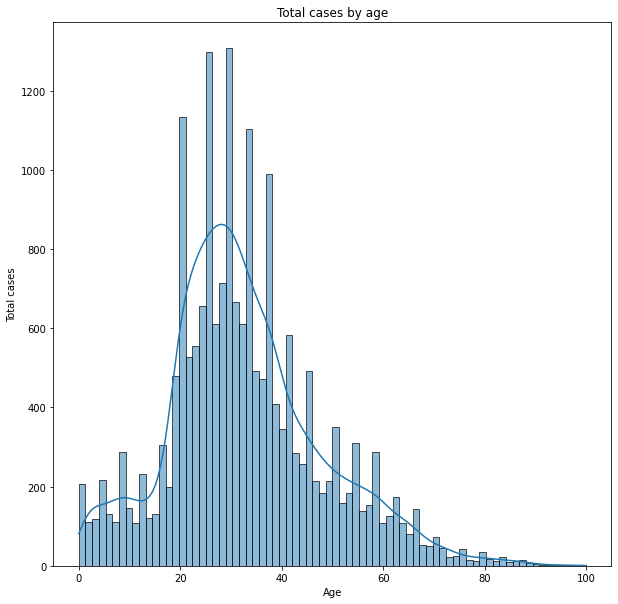

In [46]:
f, ax = plt.subplots(figsize=(10, 10))
sns.histplot(df['Tuổi'], kde=True)
plt.title('Total cases by age')
plt.xlabel('Age')
plt.ylabel('Total cases')
plt.show()

c:\users\hangu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


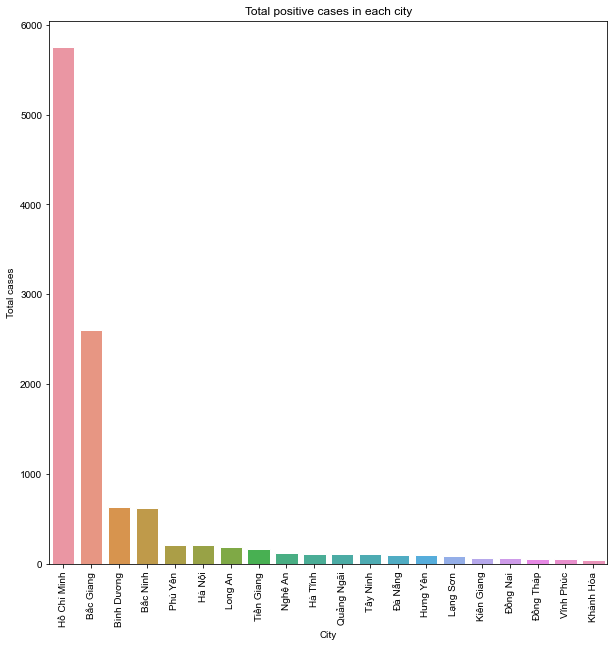

In [47]:
f, ax = plt.subplots(figsize=(10, 10))

sns.set_style('whitegrid')
sns.barplot('Địa điểm', 'total_positive_case', data=df_pos_group_by_city[:20], ci=None)
plt.title('Total positive cases in each city')
plt.xlabel('City')
plt.ylabel('Total cases')
plt.xticks(rotation=90);

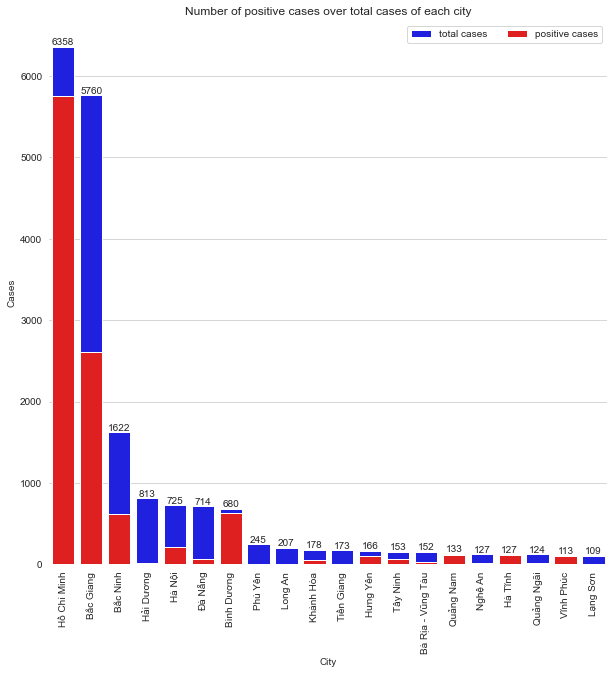

In [48]:
f, ax = plt.subplots(figsize=(10, 10))

bar1=df_by_city['total_positive_case'][:20]
bar2=df_by_city['total_case'][:20]
x = df_by_city['Địa điểm'][:20]

ax = sns.barplot(x=x, y=bar2, label = 'total cases', color='b')
ax = sns.barplot(x=x, y=bar1, label = 'positive cases', color='r')
  
# renaming the axes
ax.set(xlabel="City", ylabel="Cases",title = "Number of positive cases over total cases of each city")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.despine(left=True, bottom=True)
ax.legend(ncol=7, loc="best", frameon=True)

#displayin value on each barplot
ax.bar_label(ax.containers[0])

#visulaizing illustration
plt.show()

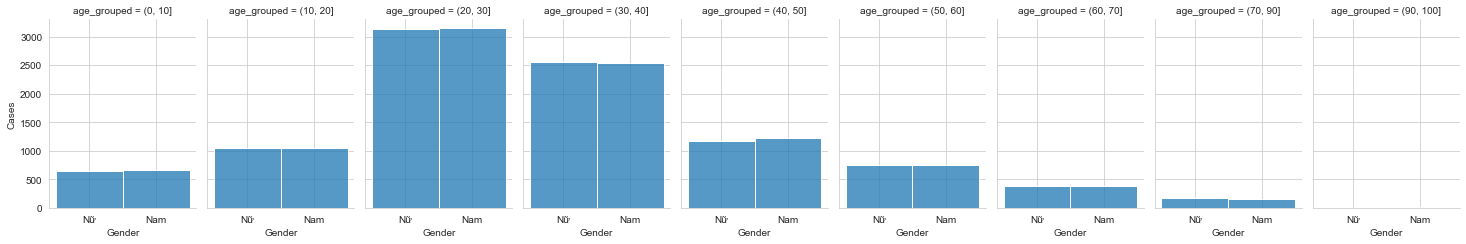

In [49]:
g = sns.FacetGrid(df, col="age_grouped", height=3.5, aspect=.65)
g.map(sns.histplot, "Giới tính")
g.set(xlabel="Gender",ylabel='Cases')

In [50]:
df

,ID,Tuổi,Giới tính,Địa điểm,Tình trạng,Quốc tịch,status,gender,age_range,nationality,in_HCM,age_grouped
0,1,66,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,0,0,1,"(60, 70]"
1,2,28,Nam,Hồ Chí Minh,Khỏi,Trung Quốc,0,1,1,0,1,"(20, 30]"
2,3,25,Nữ,Thanh Hóa,Khỏi,Việt Nam,0,0,1,1,0,"(20, 30]"
3,4,29,Nam,Vĩnh Phúc,Khỏi,Việt Nam,0,1,1,1,0,"(20, 30]"
4,5,23,Nữ,Vĩnh Phúc,Khỏi,Việt Nam,0,0,1,1,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...
19928,19929,18,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19929,19930,15,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(10, 20]"
19930,19931,23,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(20, 30]"
19931,19932,50,Nữ,Hồ Chí Minh,Đang điều trị,Việt Nam,1,0,1,1,1,"(40, 50]"


In [52]:
pd.pivot_table(df, index = 'Địa điểm', values = 'status', aggfunc = 'count').sort_values('status', ascending=False)

,status
Địa điểm,
Hồ Chí Minh,6358
Bắc Giang,5760
Bắc Ninh,1622
Hải Dương,813
Hà Nội,725
Đà Nẵng,714
Bình Dương,680
Phú Yên,245
Long An,207


In [54]:
pd.pivot_table(df, index = ['Địa điểm','Giới tính'], values = 'status', aggfunc = 'count').sort_values('status', ascending=False)

status
Địa điểm    Giới tính        
Hồ Chí Minh Nữ           3182
            Nam          3176
Bắc Giang   Nữ           2912
            Nam          2848
Bắc Ninh    Nữ            819
...                       ...
Tuyên Quang Nữ              1
Cà Mau      Nữ              1
Sơn La      Nữ              1
Lai Châu    Nữ              1
Bình Phước  Nam             1

[111 rows x 1 columns]

In [55]:
pd.pivot_table(df, index ='Địa điểm', columns = 'Tình trạng', values = 'status', aggfunc = 'count')

Tình trạng,Khỏi,Đang điều trị
Địa điểm,,
An Giang,9.0,46.0
Bà Rịa - Vũng Tàu,123.0,29.0
Bình Dương,45.0,635.0
Bình Phước,NaN,3.0
Bình Thuận,11.0,14.0
Bình Định,1.0,14.0
Bạc Liêu,53.0,3.0
Bắc Giang,3153.0,2607.0
Bắc Kạn,NaN,5.0
